# Plots for Comparing Two or More Samples
> In the case of two samples, we denote the data $x_{1},\cdots,x_{n}$ and $y_{1}, \cdots, y_{m}$

## Quantile-Quantile (Q-Q) Plot
- The ***Quantile-Quantile*** or ***Q-Q plot*** checks if the distributional shape of two samples is the same or not. For this plot, we require the sample sizes are the same. Then the ranked quantiles of the first sample are plotted against the ranked quantile of the second sample. In the case where the samples have a similar distributional shape, the result plot appears like a collection of increasing points along a straight line. Hence, Q-Q plots serve as a mechanism to compare the distributional shapes of two samples.
- A different variant of Q-Q plots is when the quantiles of a single sample are plotted against the quantiles of a theoretical distribution. Another variant is the ***Probability-Probability*** or ***P-P plot*** where cumulative probability are used on the axes instead of quantiles.
- Plot in Julia

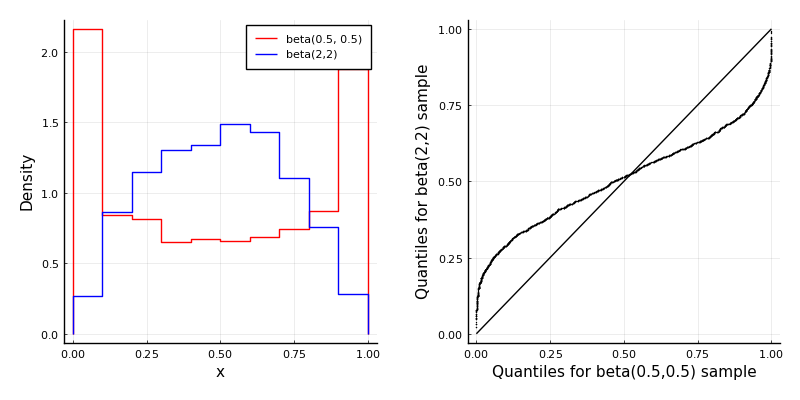

In [2]:
using Random, Distributions, StatsPlots, Plots, Measures;pyplot()
Random.seed!(0)

b1, b2 = 0.5, 2
dist1, dist2 = Beta(b1,b1), Beta(b2, b2)

n = 2000
data1 = rand(dist1, n)
data2 = rand(dist2, n)

stephist(data1, bins=15, label="beta($b1, $b1)", c=:red, normed=true)
p1 = stephist!(data2, bins=15, label="beta($b2,$b2)", 
    c=:blue, xlabel="x", ylabel="Density", normed=true)

p2 = qqplot(data1, data2, c=:black, ms=1, msw=0,
    xlabel="Quantiles for beta($b1,$b1) sample",
    ylabel="Quantiles for beta($b2,$b2) sample",
    legend=false)

plot(p1,p2, size=(800,400), margin=5mm)

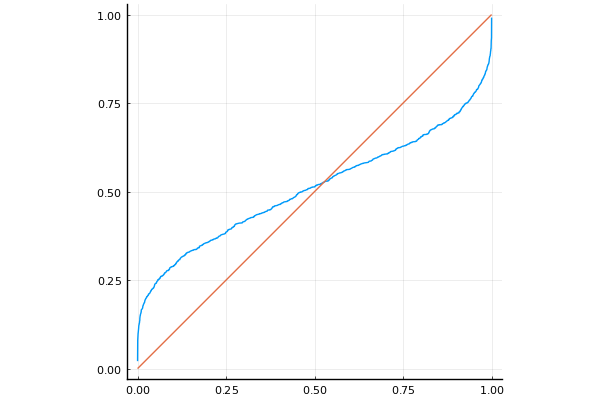

In [3]:
plot(sort(data1), sort(data2))
plot!([0,1],[0,1],aspect_ratio = 1, legend=:none)

## Box Plot
- The ***box plot***, also known as a ***box and whisker plot***, is commonly used to visually draw conclusions of, and to compare two or more single-sample datasets. It displays the first and third quantiles along with the median. The location of the whiskers is typically given by
$$
\text{minimum} = Q_{1} - 1.5IQR, \quad \text{maximum} = Q_{3} + 1.5IQR,
$$
- Plot in Julia

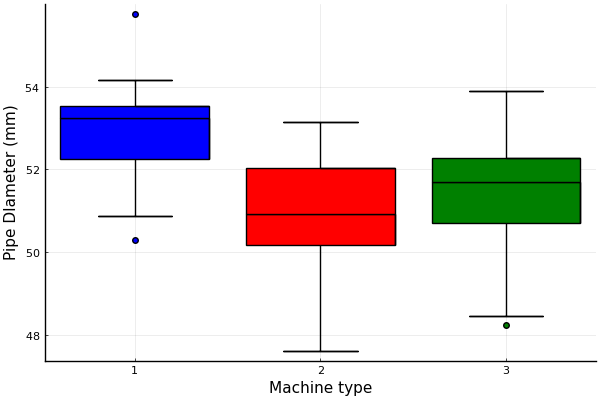

In [4]:
using CSV, StatsPlots, DataFrames; pyplot()

data1 = CSV.read("../data/machine1.csv", DataFrame ,header=false)[:,1]
data2 = CSV.read("../data/machine2.csv", DataFrame ,header=false)[:,1]
data3 = CSV.read("../data/machine3.csv", DataFrame ,header=false)[:,1]

boxplot([data1, data2, data3], c=[:blue :red :green], label="",
    xticks=([1:1:3;], ["1", "2", "3"]), xlabel="Machine type",
    ylabel="Pipe DIameter (mm)")

## Violin Plot
- The ***violin plot*** is another plot can be used to compare multiple sample populations. It is similar to the box plot, however, the shape of each sample is represented by a mirrored kernel density estimate of the data. (One can not only see the basic descriptive statistics of each sample but also the shape of distribution of each sample.)
- Plot in Julia

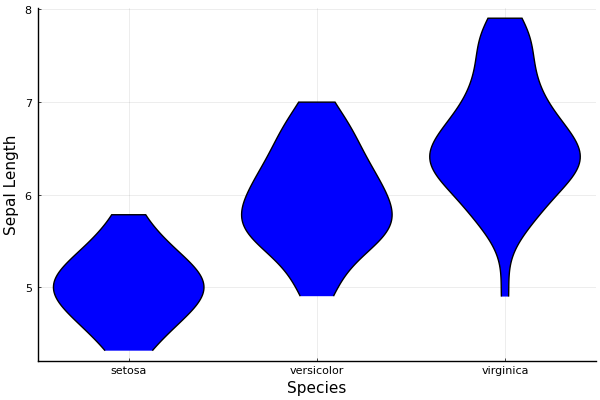

In [5]:
using RDatasets, StatsPlots

iris = dataset("datasets", "iris")
@df iris violin(:Species, :SepalLength,
    fill=:blue, xlabel="Species", ylabel="Sepal Length", legend=false)